In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import spacy

In [2]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [3]:
# Load Dataset (Replace 'data.csv' with your actual dataset file)
try:
    df = pd.read_csv('telegram_amharic_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset file not found. Ensure 'telegram_messages.csv' exists in the working directory.")
    raise

Dataset loaded successfully.


In [9]:
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['Channel Username', 'ID', 'Message', 'Date'], dtype='object')


In [10]:
# Convert 'Date' column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
    df.rename(columns={'Date': 'date'}, inplace=True)  # Rename to 'date' for consistency
else:
    print("'Date' column not found in dataset.")
    raise KeyError("Dataset must contain a 'Date' column.")

In [11]:
print(df[['date']].head())  # Display the first few rows of the 'date' column
print(df['date'].dtype)  # Confirm the column is of datetime type


                       date
0 2025-01-17 06:59:57+00:00
1 2025-01-17 06:59:57+00:00
2 2025-01-16 13:41:31+00:00
3 2025-01-16 10:07:54+00:00
4 2025-01-16 09:20:43+00:00
datetime64[ns, UTC]


In [12]:
# Text Cleaning Function
def clean_text(text):
    """Clean text by removing special characters, links, and normalizing."""
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)  # Retain only alphanumeric and spaces
    text = text.lower().strip()  # Lowercase and strip whitespace
    return text


In [ ]:
# Apply text cleaning
if 'Message' in df.columns:
    def clean_text(text):
        """Clean text by removing special characters, links, and normalizing."""
        text = re.sub(r"http\S+", "", text)  # Remove URLs
        text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)  # Retain only alphanumeric and spaces
        text = text.lower().strip()  # Lowercase and strip whitespace
        return text
    
    df['cleaned_text'] = df['Message'].apply(clean_text)  # Use 'Message' instead of 'text'
    print("Text cleaning applied successfully.")
else:
    print("'Message' column not found in dataset.")
    raise KeyError("Dataset must contain a 'Message' column for text processing.")

Text cleaning applied successfully.


In [15]:
# Tokenization Function
def spacy_tokenize(text):
    """Tokenize text using spaCy."""
    doc = nlp(text)
    return [token.text for token in doc]


In [16]:
df['tokens'] = df['cleaned_text'].apply(spacy_tokenize)


In [17]:
df.to_csv('preprocessed_telegram_messages.csv', index=False)
print("Preprocessed data saved to 'preprocessed_telegram_messages.csv'.")


Preprocessed data saved to 'preprocessed_telegram_messages.csv'.


In [18]:
# --- Analysis 1: Word Frequency ---
all_tokens = [token for tokens in df['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)  # Top 20 most frequent words


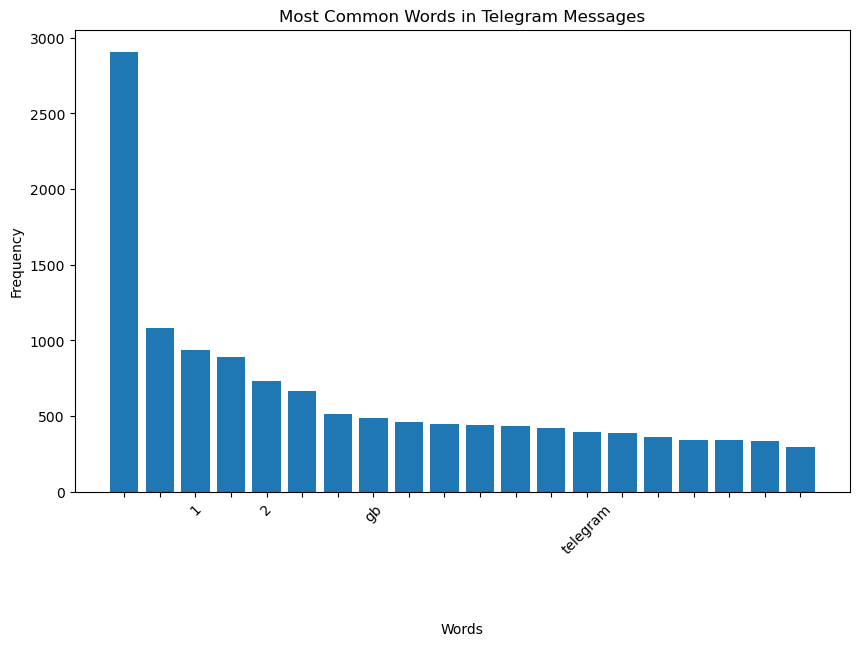

In [19]:

# Plot Word Frequency
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Most Common Words in Telegram Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

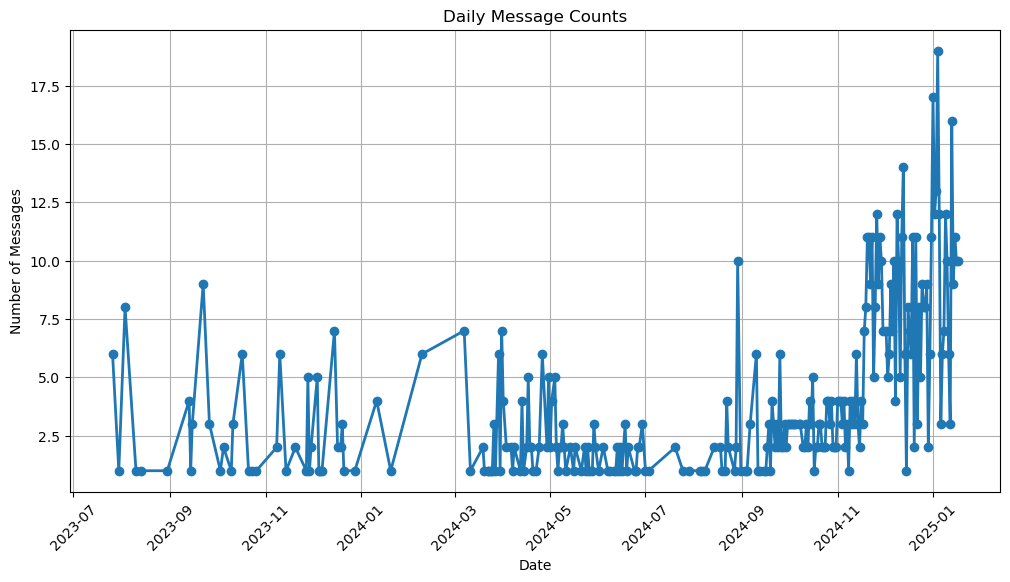

In [20]:
# --- Analysis 2: Message Activity Over Time ---
if 'date' in df.columns:
    df['date_only'] = df['date'].dt.date  # Extract date only
    daily_message_count = df.groupby('date_only').size()

    # Plot Daily Message Counts
    plt.figure(figsize=(12, 6))
    plt.plot(daily_message_count.index, daily_message_count.values, marker='o', linestyle='-', linewidth=2)
    plt.title("Daily Message Counts")
    plt.xlabel("Date")
    plt.ylabel("Number of Messages")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("Time series analysis cannot proceed without a 'date' column.")


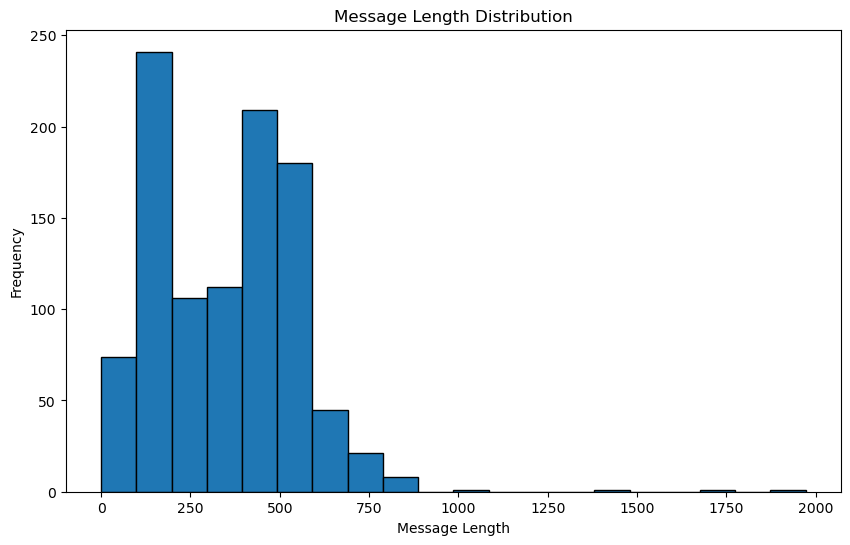

In [21]:
# --- Analysis 3: Message Length Distribution ---
df['message_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['message_length'], bins=20, edgecolor='black')
plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()